In [8]:
pwd ../../..

'/home/cane/Documents/scvi-tools/scvi-hub-models/src/scvi_hub_models'

In [37]:
import dvc.api

# Path to the file in the DVC repository
file_path = "data/mouse_thymus_cite.h5mu"
repo_url = "https://github.com/YosefLab/scvi-hub-models"

# Get the HTTP/HTTPS URL for the file
file_url = dvc.api.get_url(path=file_path, repo=repo_url, remote="gdrive_remote", rev="merge")

print(f"Resolved file URL: {file_url}")

Resolved file URL: gdrive://1MbX5Au5QRgagdXUaV9xvgLB9lOEVbfbQ/files/md5/27/ae88708a0e2e42591f8665601ca915


In [39]:
dvc.api.get_url

Signature:
dvc.api.get_url(
    path: str,
    repo: Optional[str] = None,
    rev: Optional[str] = None,
    remote: Optional[str] = None,
    config: Optional[dict[str, Any]] = None,
    remote_config: Optional[dict[str, Any]] = None,
)
Docstring:
Returns the URL to the storage location of a data file or directory tracked
in a DVC repo. For Git repos, HEAD is used unless a rev argument is
supplied. The default remote is tried unless a remote argument is supplied.

Raises OutputNotFoundError if the file is not tracked by DVC.

NOTE: This function does not check for the actual existence of the file or
directory in the remote storage.

Args:
    path (str): location and file name of the target, relative to the root
        of `repo`.
    repo (str, optional): location of the DVC project or Git Repo.
        Defaults to the current DVC project (found by walking up from the
        current working directory tree).
        It can be a URL or a file system path.
        Both HTTP and SSH pr

In [22]:
import dvc.api

# Define your DVC repo and file path
repo_url = "https://github.com/YosefLab/scvi-hub-models"
file_path = "data/mouse_thymus_cite.h5mu"

# Google Drive download URL template
gdrive_url_template = "https://drive.google.com/uc?export=download&id={file_id}"

# Fetch the file info from DVC
with dvc.api.open(path=file_path, repo=repo_url) as f:
    print(f"File ID: {f.read().decode()}")

KeyboardInterrupt: 

In [35]:
import requests

def get_file_url(folder_id, file_name):
    """
    Search for a file in a public folder and return its download URL.

    Args:
        folder_id (str): Google Drive folder ID.
        file_name (str): Name of the file to search for.

    Returns:
        str: Download URL for the file.
    """
    url = f"https://www.googleapis.com/drive/v3/files"
    params = {
        "q": f"'{folder_id}' in parents and name='{file_name}' and trashed=false",
        "fields": "files(id, name)",
        "key": "<YOUR_PUBLIC_API_KEY>"  # Replace with your API key if needed
    }

    response = requests.get(url, params=params)
    print('eeee', response)
    response.raise_for_status()
    files = response.json().get("files", [])
    print(files)

    if not files:
        raise FileNotFoundError(f"File '{file_name}' not found in folder '{folder_id}'.")

    file_id = files[0]["id"]
    return f"https://drive.google.com/uc?id={file_id}&export=download"

# Example Usage
FOLDER_ID = "1MbX5Au5QRgagdXUaV9xvgLB9lOEVbfbQ"
FILE_NAME = "ae88708a0e2e42591f8665601ca915"

download_url = get_file_url(FOLDER_ID, FILE_NAME)
print(f"Download URL: {download_url}")

eeee <Response [400]>


HTTPError: 400 Client Error: Bad Request for url: https://www.googleapis.com/drive/v3/files?q=%271MbX5Au5QRgagdXUaV9xvgLB9lOEVbfbQ%27+in+parents+and+name%3D%27ae88708a0e2e42591f8665601ca915%27+and+trashed%3Dfalse&fields=files%28id%2C+name%29&key=%3CYOUR_PUBLIC_API_KEY%3E

In [ ]:
SERVICE_ACCOUNT_FILE

In [32]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive

def resolve_gdrive_path(service_account_file, folder_id, file_path):
    """
    Resolve a gdrive:// path to a sharable Google Drive URL.

    Args:
        service_account_file (str): Path to the service account credentials JSON.
        folder_id (str): The root folder ID in Google Drive.
        file_path (str): Logical path inside the folder.

    Returns:
        str: Public URL of the file.
    """
    gauth = GoogleAuth()
    gauth.ServiceAuth(service_account_file)
    drive = GoogleDrive(gauth)

    # Traverse the folder structure to locate the file
    current_folder_id = folder_id
    path_parts = file_path.split("/")
    for part in path_parts[:-1]:  # Traverse through directories
        query = f"'{current_folder_id}' in parents and title='{part}' and mimeType='application/vnd.google-apps.folder' and trashed=false"
        folder_list = drive.ListFile({"q": query}).GetList()
        if not folder_list:
            raise FileNotFoundError(f"Folder '{part}' not found in path '{file_path}'")
        current_folder_id = folder_list[0]["id"]

    # Locate the file in the final folder
    file_name = path_parts[-1]
    query = f"'{current_folder_id}' in parents and title='{file_name}' and trashed=false"
    file_list = drive.ListFile({"q": query}).GetList()
    if not file_list:
        raise FileNotFoundError(f"File '{file_name}' not found in path '{file_path}'")

    file = file_list[0]
    # Generate a public sharable URL
    file.InsertPermission({
        "type": "anyone",
        "value": "anyone",
        "role": "reader"
    })
    return file["alternateLink"]

# Example Usage
FOLDER_ID = "1MbX5Au5QRgagdXUaV9xvgLB9lOEVbfbQ"
FILE_PATH = "files/md5/27/ae88708a0e2e42591f8665601ca915"

public_url = resolve_gdrive_path(SERVICE_ACCOUNT_FILE, FOLDER_ID, FILE_PATH)
print(f"Public URL: {public_url}")

KeyError: 'service_config'

In [27]:
with dvc.api.open(path=file_path, repo=repo_url) as b:
    e = b.read()

KeyboardInterrupt: 

AttributeError: dvc.api.open() should be used in a with statement.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scvi
from scvi.model import SCVI
from scvi.hub import HubModel

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndat

In [4]:
hmo = HubModel.pull_from_huggingface_hub(
    repo_name="scvi-tools/mouse_thymus_cite_totalvi",
    cache_dir=".",
    revision="main",
)

Fetching 3 files: 100%|██████████| 3/3 [00:00<00:00, 15123.69it/s]


In [7]:
model = hmo.model
mdata = hmo.adata

INFO     Loading model...                                                                                          
INFO     File                                                                                                      
         ./models--scvi-tools--mouse_thymus_cite_totalvi/snapshots/a3a8922f39534c70cbff92f93abda95c701102d2/model.p
         t already downloaded                                                                                      


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             
latent_posterior_parameters
INFO     Reading adata...                                                                                          


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:136: UserWarning: Some proteins have all 0 counts in some batches. These proteins will be treated as missing measurements; however, this can occur due to experimental design/biology. Reinitialize the model with `override_missing_proteins=True`,to override this behavior.
  model = cls(adata, **non_kwargs, **kwargs)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: Fut

In [9]:
model.module.minified_data_type

'latent_posterior_parameters'

In [10]:
import scanpy as sc

In [11]:
mdata.obs[mdata['rna'].obs.columns] = mdata['rna'].obs

SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False
SSSS minified_data latent_posterior_parameters False


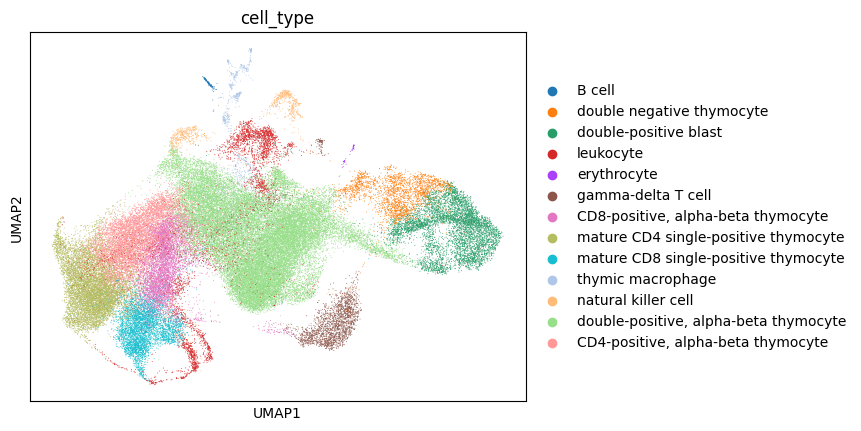

In [12]:
mdata.obsm['X_totalvi'] = model.get_latent_representation(batch_size=4096)
sc.pp.neighbors(mdata, use_rep='X_totalvi')
sc.tl.umap(mdata)
mdata['rna'].obsm['X_umap'] = mdata.obsm['X_umap']
sc.pl.umap(mdata['rna'], color='cell_type')

In [12]:
import sys
sys.path.insert(0, '/home/cane/Documents/scvi-tools/scvi-hub-models/src')

In [13]:
import logging
import os

import scanpy as sc
from anndata import AnnData
from mudata import MuData
from scvi.model import TOTALVI

from scvi_hub_models.models import BaseModelWorkflow

logger = logging.getLogger(__name__)

In [14]:
import logging
from scvi_hub_models.config import json_data_store

In [16]:
model.adata

MuData object with n_obs × n_vars = 72042 × 4111
  obs:	'_scvi_labels', 'observed_lib_size'
  var:	'cv_gene'
  uns:	'_scvi_adata_minify_type', '_scvi_manager_uuid', '_scvi_uuid'
  obsm:	'totalvi_latent_qzm', 'totalvi_latent_qzv'
  2 modalities
    rna:	72042 x 4000
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch', 'cv_cell'
      var:	'gene_id', 'gene_name', 'expression_type', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'cv_gene'
      uns:	'annotations_clean_colors', 'batch_condition', 'batch_indices_colors', 'citation', 'hvg', 'leiden', 'neighbors', 'protein_names', 'schema_reference', 'schema_version', 'title', 'totalVI_genes', 'totalVI_proteins', 'umap'
      obsm:	'X_totalVI', 'X_umap'
      varm:	'lfc_model', 'lfc_raw'
      layers:	'counts'
    protein:	72042 x 111
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch', 'cv_cell'
      var:	'cv_gene'
      varm:	'lfc_model', 'lfc_raw'

In [17]:
from scvi_hub_models.models import _mouse_thymus_cite
Workflow = _mouse_thymus_cite._Workflow

In [45]:
self = Workflow(config=json_data_store['mouse_thymus_cite'], save_dir='.', reload_model=False, reload_data=False)

In [46]:
self.config['extra_data_kwargs']['reference_adata_fname']

'mouse_thymus_cite.h5ad'

In [47]:
mdata = self.get_adata()

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [48]:
model = self.get_model(mdata)

INFO     File /home/cane/Documents/scvi-tools/scvi-hub-models/data/mouse_thymus_cite_totalvi/model.pt already      
         downloaded                                                                                                


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

INFO     Computing empirical prior initialization for protein background.                                          


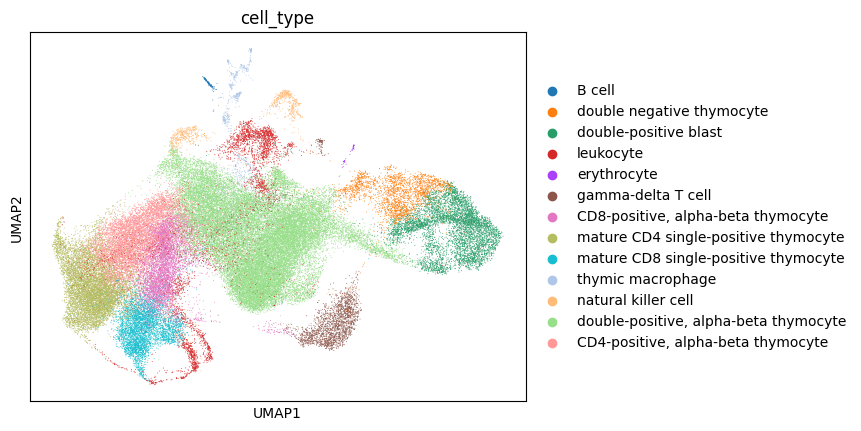

In [49]:
mdata.obsm['X_totalvi'] = model.get_latent_representation()
sc.pp.neighbors(mdata, use_rep='X_totalvi')
sc.tl.umap(mdata)
mdata['rna'].obsm['X_umap'] = mdata.obsm['X_umap']
sc.pl.umap(mdata['rna'], color='cell_type')

In [50]:
model_path = self._minify_and_save_model(model, mdata)

/home/cane/Documents/scvi-tools/src/scvi/utils/_dependencies.py:24: UserWarning: n_top_genes_fallback=100 is greater than 10% of n_vars 111 in the dataset. Setting it to 10% of n_vars.
  return fn(*args, **kwargs)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the ne

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [51]:
model

TotalVI Model with the following params: 
n_latent: 20, gene_dispersion: gene, protein_dispersion: protein, gene_likelihood: nb, latent_distribution: normal
Training status: Trained
Model's adata is minified?: True
Model's adata is minified?: True

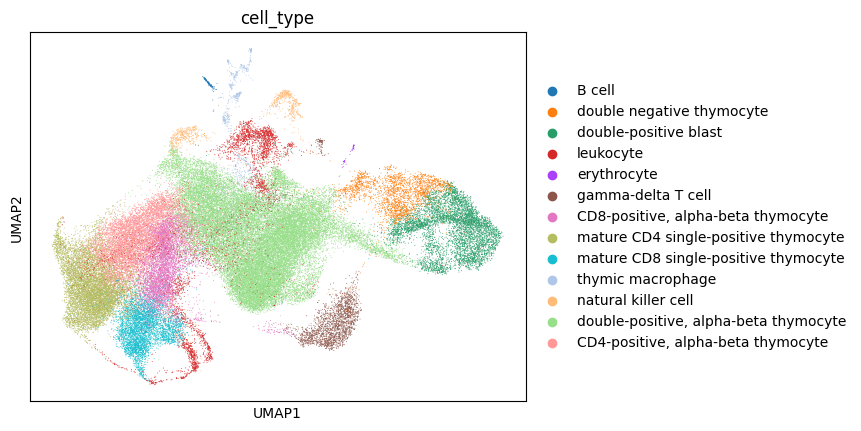

In [52]:
mdata.obsm['X_totalvi'] = model.get_latent_representation()
sc.pp.neighbors(mdata, use_rep='X_totalvi')
sc.tl.umap(mdata)
mdata['rna'].obsm['X_umap'] = mdata.obsm['X_umap']
sc.pl.umap(mdata['rna'], color='cell_type')

In [54]:
model_path

'./mini_totalvi'

In [55]:
model_reload = TOTALVI.load(model_path)

INFO     File ./mini_totalvi/model.pt already downloaded                                                           


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:136: UserWarning: Some proteins have all 0 counts in some batches. These proteins will be treated as missing measurements; however, this can occur due to experimental design/biology. Reinitialize the model with `override_missing_proteins=True`,to override this behavior.
  model = cls(adata, **non_kwargs, **kwargs)


In [59]:
mdata

MuData object with n_obs × n_vars = 72042 × 4111
  obs:	'_scvi_labels'
  uns:	'_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap'
  obsm:	'X_totalvi', 'X_umap', 'totalvi_latent_qzm', 'totalvi_latent_qzv'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	72042 x 4000
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch', 'cv_cell_ratio'
      var:	'gene_id', 'gene_name', 'expression_type', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'cv_gene_ratio'
      uns:	'annotations_clean_colors', 'batch_condition', 'batch_indices_colors', 'citation', 'hvg', 'leiden', 'neighbors', 'protein_names', 'schema_reference', 'schema_version', 'title', 'totalVI_genes', 'totalVI_proteins', 'umap', 'cell_type_colors'
      obsm:	'X_totalVI', 'X_umap'
      varm:	'lfc_model', 'lfc_raw'
      layers:	'counts'
    protein:	72042 x 111
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch', 'cv_cell_ratio'
      var:	'cv_gene_ratio'
      varm:	'lfc_model', 'lfc_raw'

In [60]:
mdata.obsm['X_totalvi'], mdata.obsm['totalvi_latent_qzm']

(array([[-1.1629528e-01, -7.1097808e+00, -4.5238435e-04, ...,
         -1.1836724e+00, -1.4212704e-01, -6.5503889e-01],
        [-1.1629528e-01, -7.1097808e+00, -4.5238435e-04, ...,
         -1.1836724e+00, -1.4212704e-01, -6.5503889e-01],
        [-1.1629528e-01, -7.1097808e+00, -4.5238435e-04, ...,
         -1.1836724e+00, -1.4212704e-01, -6.5503889e-01],
        ...,
        [-3.1803697e-01, -6.7711749e+00,  2.0667990e-01, ...,
         -1.0135450e+00,  1.4494857e-01, -7.6172739e-01],
        [-3.1803697e-01, -6.7711749e+00,  2.0667990e-01, ...,
         -1.0135450e+00,  1.4494857e-01, -7.6172739e-01],
        [-3.1803697e-01, -6.7711749e+00,  2.0667990e-01, ...,
         -1.0135450e+00,  1.4494857e-01, -7.6172739e-01]], dtype=float32),
 array([[ 0.45362723, -0.16305983,  0.28369218, ...,  1.3742867 ,
          0.8605523 ,  0.5176837 ],
        [ 0.68611884,  0.19614196, -0.5491371 , ...,  0.6523777 ,
          0.96766794, -0.6797392 ],
        [-0.40027303,  0.49039757,  0.9794669 

In [58]:
model_reload

TotalVI Model with the following params: 
n_latent: 20, gene_dispersion: gene, protein_dispersion: protein, gene_likelihood: nb, latent_distribution: normal
Training status: Trained
Model's adata is minified?: True
Model's adata is minified?: True

In [1]:
mdata.obsm['X_totalvi'] = model_reload.get_latent_representation()
sc.pp.neighbors(mdata, use_rep='X_totalvi')
sc.tl.umap(mdata)
mdata['rna'].obsm['X_umap'] = mdata.obsm['X_umap']
sc.pl.umap(mdata['rna'], color='cell_type')

NameError: name 'model_reload' is not defined

In [27]:
hub_model = self._create_hub_model(model_path)
hub_model = self._upload_hub_model(hub_model)

INFO     File ./mini_totalvi/model.pt already downloaded                                                           


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

INFO     File ./mini_totalvi/model.pt already downloaded                                                           


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

In [29]:
hmo = HubModel.pull_from_huggingface_hub(
    repo_name="scvi-tools/mouse_thymus_cite_totalvi",
    cache_dir=".",
    revision="main",
)

Fetching 3 files: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


In [30]:
model_new = hmo.model
mdata_new = hmo.adata

INFO     Loading model...                                                                                          
INFO     File                                                                                                      
         ./models--scvi-tools--mouse_thymus_cite_totalvi/snapshots/a3a8922f39534c70cbff92f93abda95c701102d2/model.p
         t already downloaded                                                                                      


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:136: UserWarning: Some proteins have all 0 counts in some batches. These proteins will be treated as missing measurements; however, this can occur due to experimental design/biology. Reinitialize the model with `override_missing_proteins=True`,to override this behavior.
  model = cls(adata, **non_kwargs, **kwargs)


INFO     Reading adata...                                                                                          


/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [31]:
model_new

TotalVI Model with the following params: 
n_latent: 20, gene_dispersion: gene, protein_dispersion: protein, gene_likelihood: nb, latent_distribution: normal
Training status: Trained
Model's adata is minified?: True
Model's adata is minified?: True

In [32]:
import scanpy as sc

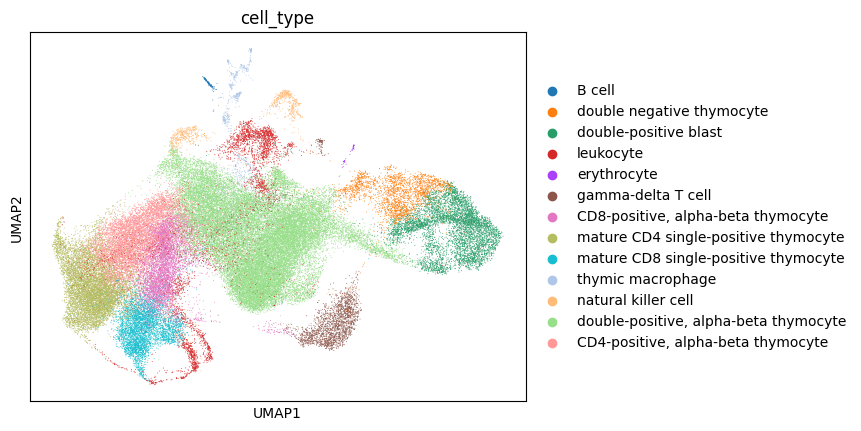

In [34]:
mdata.obs[mdata['rna'].obs.columns] = mdata['rna'].obs
mdata.obsm['X_totalvi'] = model.get_latent_representation()
sc.pp.neighbors(mdata, use_rep='X_totalvi')
sc.tl.umap(mdata)
mdata['rna'].obsm['X_umap'] = mdata.obsm['X_umap']
sc.pl.umap(mdata['rna'], color='cell_type')

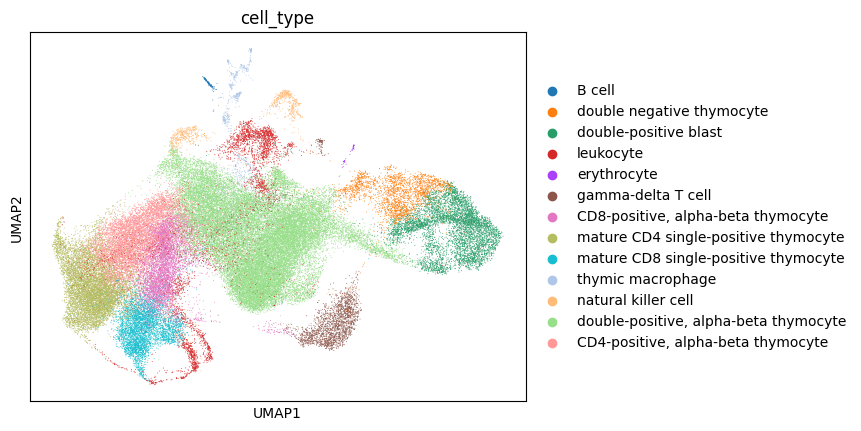

In [35]:
mdata_new.obs[mdata['rna'].obs.columns] = mdata_new['rna'].obs
mdata_new.obsm['X_totalvi'] = model.get_latent_representation()
sc.pp.neighbors(mdata_new, use_rep='X_totalvi')
sc.tl.umap(mdata_new)
mdata_new['rna'].obsm['X_umap'] = mdata_new.obsm['X_umap']
sc.pl.umap(mdata_new['rna'], color='cell_type')

In [41]:
model_reload = TOTALVI.load(model_path)

INFO     File ./mini_totalvi/model.pt already downloaded                                                           


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:136: UserWarning: Some proteins have all 0 counts in some batches. These proteins will be treated as missing measurements; however, this can occur due to experimental design/biology. Reinitialize the model with `override_missing_proteins=True`,to override this behavior.
  model = cls(adata, **non_kwargs, **kwargs)


In [38]:
model_reload

TotalVI Model with the following params: 
n_latent: 20, gene_dispersion: gene, protein_dispersion: protein, gene_likelihood: nb, latent_distribution: normal
Training status: Trained
Model's adata is minified?: True
Model's adata is minified?: True

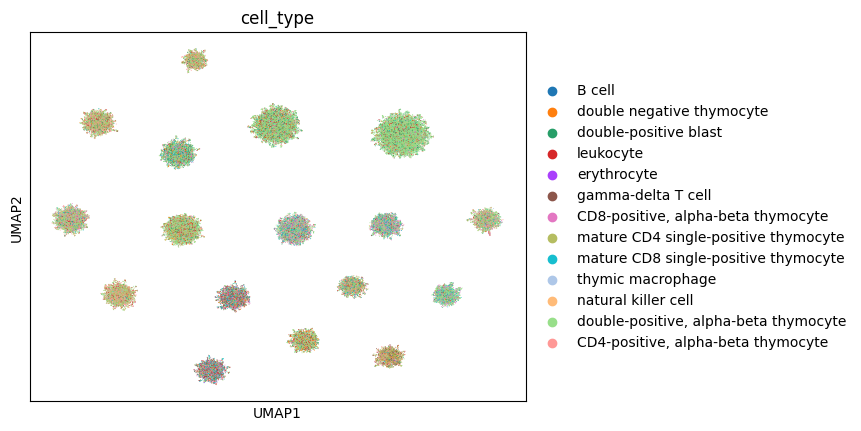

In [40]:
mdata_new.obs[mdata['rna'].obs.columns] = mdata_new['rna'].obs
mdata_new.obsm['X_totalvi'] = model_reload.get_latent_representation()
sc.pp.neighbors(mdata_new, use_rep='X_totalvi')
sc.tl.umap(mdata_new)
mdata_new['rna'].obsm['X_umap'] = mdata_new.obsm['X_umap']
sc.pl.umap(mdata_new['rna'], color='cell_type')

In [ ]:
model_path = self._minify_and_save_model(model, mdata)

In [48]:
mdata

MuData object with n_obs × n_vars = 72042 × 4111
  obs:	'_scvi_labels'
  uns:	'_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap'
  obsm:	'X_totalvi', 'X_umap'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	72042 x 4000
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch'
      var:	'gene_id', 'gene_name', 'expression_type', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'annotations_clean_colors', 'batch_condition', 'batch_indices_colors', 'citation', 'hvg', 'leiden', 'neighbors', 'protein_names', 'schema_reference', 'schema_version', 'title', 'totalVI_genes', 'totalVI_proteins', 'umap', 'cell_type_colors'
      obsm:	'X_totalVI', 'X_umap'
      layers:	'counts'
    protein:	72042 x 111
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch'

In [23]:

model_path = self._minify_and_save_model(model, mdata)
hub_model = self._create_hub_model(model_path)
hub_model = self._upload_hub_model(hub_model)

INFO     Computing empirical prior initialization for protein background.                                          


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/lightning/pytorch/core/optimizer.py:316: The lr scheduler dict contains the key(s) ['monitor'], but the keys will be igno

Epoch 200/200: 100%|██████████| 200/200 [22:05<00:00,  7.33s/it, v_num=1, train_loss_step=1.58e+3, train_loss_epoch=1.6e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [22:05<00:00,  6.63s/it, v_num=1, train_loss_step=1.58e+3, train_loss_epoch=1.6e+3]


['rna', 'protein']


/home/cane/Documents/scvi-tools/src/scvi/criticism/_ppc.py:293: UserWarning: n_top_genes_fallback=100 is greater than 10% of the number ofgenes f(134) in the dataset. Setting it to 10%.
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [12]:
hub_model = self._create_hub_model(model_path)
hub_model = self._upload_hub_model(hub_model)

INFO     File ../mini_totalvi/model.pt already downloaded                                                          


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

INFO     File ../mini_totalvi/model.pt already downloaded                                                          


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

In [ ]:
mdata.update()
mdata['protein'].obs = mdata['rna'].obs
mdata

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 72042 × 16104
  obs:	'_scvi_labels', 'cv_cell'
  var:	'cv_gene'
  uns:	'_scvi_uuid', '_scvi_manager_uuid'
  2 modalities
    rna:	72042 x 15993
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch'
      var:	'gene_id', 'gene_name', 'expression_type', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_counts'
      uns:	'AB_adata', 'annotations_clean_colors', 'batch_condition', 'batch_indices_colors', 'citation', 'leiden', 'neighbors', 'protein_names', 'schema_reference', 'schema_version', 'title', 'totalVI_genes', 'totalVI_proteins', 'umap'
      obsm:	'X_totalVI', 'X_umap', 'denoised_genes', 'denoised_proteins'
      layers:	'counts'
    protein:	72042 x 111
      obs:	'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime', 'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1', 'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt', 'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'batch_indices', 'sample_id', 'Location', 'donor_id', 'sample_weeks', 'genotype', 'Lineage_by_genotypeSlingshot', 'Lineage_by_genotype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch'

In [ ]:
model_path = self._minify_and_save_model(model, mdata)

['rna', 'protein']


KeyError: "Values ['rna', 'protein'], from ['rna', 'protein'], are not valid obs/ var names or indices."

In [ ]:
hub_model = self._create_hub_model(model_path)
hub_model = self._upload_hub_model(hub_model)